## Image slicing

In [1]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import math, os, glob

%matplotlib inline

In [2]:
"""
Slices image into patches of size nxn according to stride
Zero pads any patches that are cut off at borders of image
Returns numpy array of image patches
"""

def slice_image(img, n, stride, channels):
    x_dim, y_dim = img.shape[0], img.shape[1]
    
    # calculate number of output slices
    num_x = math.ceil((x_dim-n)/stride + 1)
    num_y = math.ceil((y_dim-n)/stride + 1)

    # iterate through img 
    results = np.zeros((num_x*num_y, n, n, channels), dtype=int)
    counter = 0

    for i in range(num_y):
        y = 0 if i==0 else y + stride
        for j in range(num_x):
            x = 0 if j==0 else x + stride

            im_slice = img[x:x+n, y:y+n]
            
            dims = im_slice.shape
            if channels == 1:
                im_slice = im_slice.reshape((dims[0],dims[1],1))
            results[counter,0:im_slice.shape[0],0:im_slice.shape[1]] = im_slice
            counter += 1
    return results

### Example usage on single image

By setting *n* to 512, we will end up with 512x512 image slices.  

When the `stride` value is equal to `n`, there is no overlap in the output image slices.  If we set `stride` to 256, each slice would overlap its neighboring slices by 50%.  

For RGB images, `channels` should be set to 3, one for each color channel (red, green, blue).  Black and white images have 1 channel, so this value should be adjusted.  

The path to your sample file `f` should be updated.

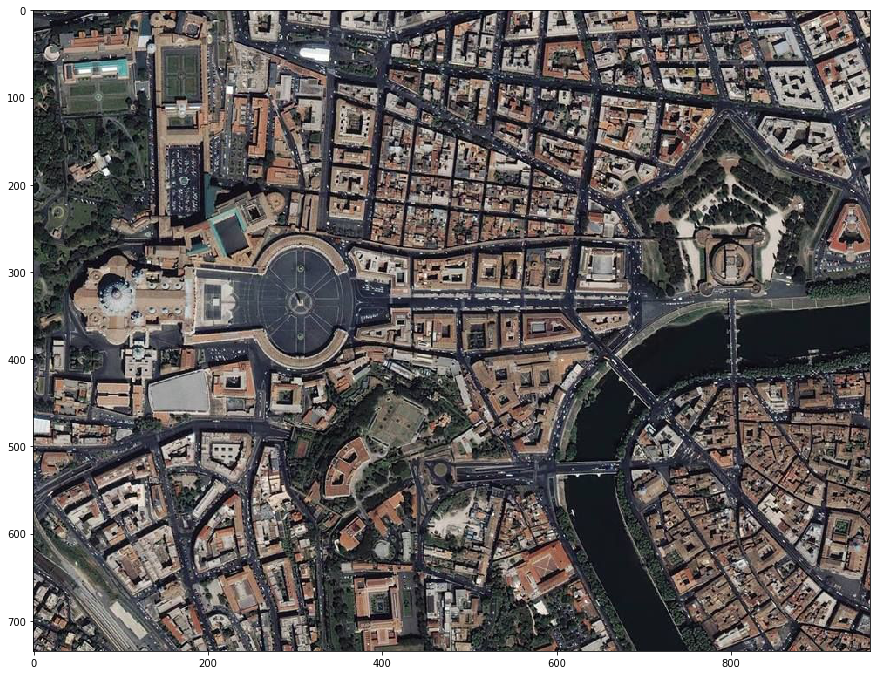

In [3]:
n = 512
stride = n
channels = 3

f = '../data/image1.jpg'
im = Image.open(f)
im_arr = np.asarray(im)
plt.figure(figsize=(15,15))
plt.imshow(im_arr)

The sample image is 735x960 pixels.

In [4]:
im_arr.shape

(735, 960, 3)

The shape of our `results` array tells us we have:
4 image slices that are
512x512 pixels with
3 color channels (RGB)

In [5]:
results = slice_image(im_arr, n, stride, channels)
results.shape

(4, 512, 512, 3)

The below image slice is the top left of the original image:

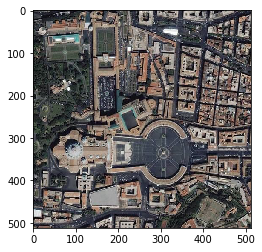

In [6]:
plt.imshow(results[0])

### Slice all images, saving output

All images to be sliced should be in one folder, and we set `im_dir` to the path of that folder.  The image slices will be written to a parallel directory, appended with the `postfix` and pixel size `n`

In [7]:
im_dir = '../data'
postfix = '_sliced'

im_dir_out = im_dir + postfix + '_' + str(n)

In [8]:
im_filenames = glob.glob(im_dir+'/*.jpg', recursive=True)

# Create output directories 
if not os.path.exists(im_dir_out):
    os.makedirs(im_dir_out)

for i, im_filename in enumerate(im_filenames):
    im = Image.open(im_filename)
    im = np.asarray(im)
    filename = im_filename.split('/')[-1] #get image name

    im_slices = slice_image(im, n, stride, 3)
    
    for j, im_slice in enumerate(im_slices):
        result = Image.fromarray(im_slice.astype(np.uint8))
        result.save(os.path.join(im_dir_out,filename.split('.')[0]+'_'+str(j)+'.jpg'))
        
    print("Processed image {}: {} ".format(i+1, filename))
    print("Dim: {}, Slices: {}".format(im.shape, im_slices.shape[0]))

Processed image 1: image1.jpg 
Dim: (735, 960, 3), Slices: 4
Processed image 2: image2.jpg 
Dim: (1253, 1880, 3), Slices: 12
